In [180]:
# Numpy and Scipy: needed for numerical analysis and statistics
import numpy as np
import scipy.stats as stats

# scipy.special: mostly not needed - only to showcase binomial calculation
from scipy.special import comb

# matplotlib und seaborn: needed for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Option to make plots visually more appealing
plt.rc("axes.spines", top=False, right=False)


# Code for Chapter 02 

## Introduction

### Notation

What will we cover:

- vectors and matrices using `numpy`
- example use case

In [181]:
vector = np.array([1,2,3,4])
vector

array([1, 2, 3, 4])

In [182]:
vector.shape

(4,)

In [183]:
matrix = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12]])

In [184]:
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [185]:
matrix.shape

(4, 3)

### Excercise

In [186]:
v1 = np.array((2,3,7))

In [187]:
v2 = np.array((-3,5,9))

In [188]:
m1 = np.array([[1,2,12],[4,3,9]])
m1

array([[ 1,  2, 12],
       [ 4,  3,  9]])

In [189]:
m2 = np.array((v1,v2))
m2

array([[ 2,  3,  7],
       [-3,  5,  9]])

In [190]:
m3 = m1 + m2
m3

array([[ 3,  5, 19],
       [ 1,  8, 18]])

### Why useful

In [191]:
beta0 = 869
beta1 = 100
x = np.array((35,45,65))
x

array([35, 45, 65])

In [192]:
yhat = beta0 + beta1*x
yhat

array([4369, 5369, 7369])

In pure matrix expression this could be writen as 

$$\hat{y} = \begin{pmatrix}
1 & 35 \\
1 &45\\
1 &65
\end{pmatrix} \begin{pmatrix}
869 \\
100 \\
\end{pmatrix}$$

or even more abstract as 
  
$$\hat{y} = X\hat{\beta}$$


In [193]:
x = np.c_[np.ones(3),np.array((35,45,65))]
betas = np.array([beta0,beta1])

In [194]:
x.shape, betas.shape

((3, 2), (2,))

In [195]:
yhat = x@betas # Matrix multiplication (dot product)
yhat

array([4369., 5369., 7369.])

### Graphing a line

In [196]:
xs = np.arange(1900,2001)
xs

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000])

In [197]:
y = 1007 - 0.39*xs
y

array([266.  , 265.61, 265.22, 264.83, 264.44, 264.05, 263.66, 263.27,
       262.88, 262.49, 262.1 , 261.71, 261.32, 260.93, 260.54, 260.15,
       259.76, 259.37, 258.98, 258.59, 258.2 , 257.81, 257.42, 257.03,
       256.64, 256.25, 255.86, 255.47, 255.08, 254.69, 254.3 , 253.91,
       253.52, 253.13, 252.74, 252.35, 251.96, 251.57, 251.18, 250.79,
       250.4 , 250.01, 249.62, 249.23, 248.84, 248.45, 248.06, 247.67,
       247.28, 246.89, 246.5 , 246.11, 245.72, 245.33, 244.94, 244.55,
       244.16, 243.77, 243.38, 242.99, 242.6 , 242.21, 241.82, 241.43,
       241.04, 240.65, 240.26, 239.87, 239.48, 239.09, 238.7 , 238.31,
       237.92, 237.53, 237.14, 236.75, 236.36, 235.97, 235.58, 235.19,
       234.8 , 234.41, 234.02, 233.63, 233.24, 232.85, 232.46, 232.07,
       231.68, 231.29, 230.9 , 230.51, 230.12, 229.73, 229.34, 228.95,
       228.56, 228.17, 227.78, 227.39, 227.  ])

<AxesSubplot:>

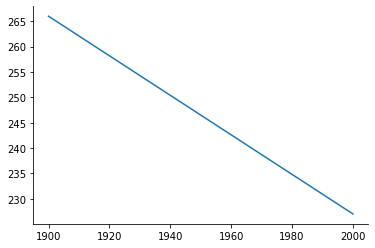

In [198]:
sns.lineplot(x=xs,y=y)

## Probability

### Randomness / uncertainty

In [199]:
error = np.random.normal(size=len(xs))
error

array([-7.29383904e-01,  2.10197138e+00,  1.87304942e+00,  1.20434275e+00,
        3.03315483e-01,  7.39124835e-01,  1.06766763e+00,  8.03777341e-01,
       -1.21081013e+00, -1.77777506e+00, -4.78946576e-01,  5.52982612e-01,
        1.36063102e+00, -9.85875332e-01,  5.17100879e-02,  1.61891458e+00,
       -3.83585538e-01,  6.75647437e-01, -1.49889167e-01, -1.83248798e-03,
       -5.02122349e-02,  7.59401973e-02,  1.49014520e+00, -7.51660042e-01,
       -4.18919095e-01,  3.43492656e-01,  3.20478160e-01,  3.30577312e-01,
       -6.30513981e-01, -5.32178117e-01, -8.73300294e-01, -2.08706458e-01,
       -8.01761934e-01,  3.93469763e-01,  1.04827644e+00, -2.66525685e+00,
       -3.24577124e-01, -7.31761119e-01, -4.61951991e-03, -9.24257822e-01,
       -2.83010052e-01, -2.38193226e+00,  5.96156036e-01, -1.50952853e+00,
        1.41432109e+00,  2.64167241e+00,  6.79230630e-01,  1.43392245e+00,
        1.23785820e-01, -8.35452476e-01, -1.19750206e+00, -2.07054697e-01,
       -8.75734886e-01,  

<AxesSubplot:>

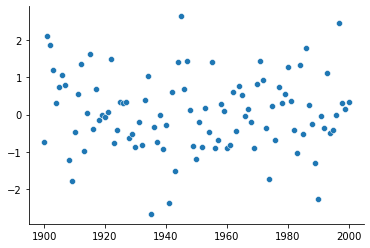

In [200]:
sns.scatterplot(x=xs, y=error)

In [201]:
y2 = 1007 - 0.39 * xs + error

<AxesSubplot:>

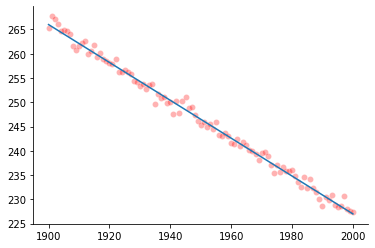

In [202]:
sns.scatterplot(x=xs, y=y2, alpha=0.3, color="red")
sns.lineplot(x=xs, y=y)

### Moment based descriptors of distributions

- mean
- standard deviation / variance


In [203]:
data = np.array([10,15,-5,20,13,7])

Manual implementation of mean and standard deviation

In [204]:
def mymean(data):
    n = len(data)
    return np.sum(data)/n

In [205]:
def mystd(data):
    n = len(data)
    return np.sqrt((1/n)*np.sum((data - np.mean(data))**2))

In [206]:
mymean(data)

10.0

In [207]:
mystd(data)

7.831560082980487

Much better: use functionality provided by `numpy`

In [208]:
np.mean(data), np.std(data)

(10.0, 7.831560082980487)

- skewness 
- kurtosis

In [209]:
skewness = np.mean(((data - np.mean(data)) / np.std(data))**3)
skewness

-0.7807040193779283

In [210]:
kurtosis = np.mean(((data - np.mean(data))/np.std(data))**4)
kurtosis

2.7208766540642717

Much better: use functionality provided by `scipy.stats`

In [211]:
import scipy.stats as stats

In [212]:
stats.skew(data)

-0.7807040193779283

In [213]:
stats.kurtosis(data, fisher=False)

2.720876654064272

### Proability distribution

In [214]:
data

array([10, 15, -5, 20, 13,  7])

<AxesSubplot:ylabel='Count'>

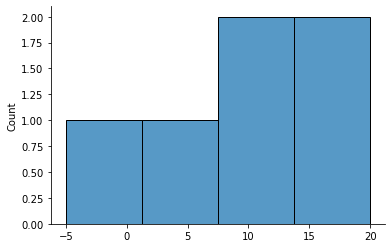

In [215]:
sns.histplot(data)

### Named distribution

Distributions and random variables form distributions can be modelled using `scipy.stats`

- use required distribution, e.g.: `stats.binom(...)`
- pass relevant distribution parameters, e.g. `n` and `p` in case of binomial distribution
- e.g. `mydist = stats.binom(100,0.05)`

- we can then use relevant functions associated with this specific distribution, most common are:
    - `pmf`: probability mass function, i.e. gives the probability for x (discrete variables)
    - `pdf`: probability density function, i.e. gives the probability for x (continuous variables)
    - `cdf`: cumulative probability distribution function, i.e. gives the probability for <= x (discrete & continuous variables)
    - `rvs`: sample random variables from distribution

Example: rvs
```
N = stats.norm(0,1) # standard normal distribution
data = N.rvs(10_000) # 10_000 values from N
```
    
    
    

#### Binomial distribution

We can tediously implement this manually

In [216]:
n = 100 # Roboter
p = 0.05 # Wahrscheinlichkeit
x = 0

comb(n,x)*p**x * (1-p)**(n-x)

0.0059205292203339975

Or write our own function

In [217]:
def bpmf(n,p, x):
    return comb(n,x)*p**x *(1-p)**(n-x)

In [218]:
n = 100
p = 0.05
x = 3

In [219]:
bpmf(n,p,x)

0.13957567793089487

But it is much easier to use existing functionality. 

In our case we can use `scipy.stats`

In [220]:
B = stats.binom(n,p)

We can calculate the probability of a random variable taken the value x using the `pmf` function

In [221]:
probability_of_x = B.pmf(x)
probability_of_x

0.1395756779308903

Much more convenient: we can also use the same logic to calculate the probabilities of many different values for x. Here we calculate the probabilities for x taken values of 0 to 100

In [222]:
xs = np.arange(0,101) # np.array with values 0 to 100
probs = B.pmf(xs) # probability for x=0 to x=100

We can then pass the data to a plot function (here: `sns.barplot`)

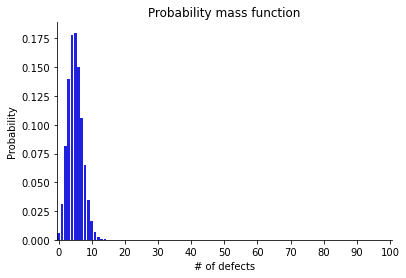

In [223]:
myplot = sns.barplot(x=xs,y=probs, color="blue")
ticks = np.arange(0,101,step=10) # 0,10,20,30...100
myplot.set_xticks(ticks)
myplot.set_xlabel("# of defects")
myplot.set_ylabel("Probability")
myplot.set_title("Probability mass function");

We can also calculate cumulative distribution function. Using the same logic.

In [224]:
cum_probability = B.cdf(xs)

We can then plot the cumulative probabilities. Note that 

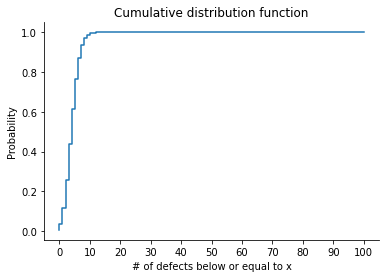

In [225]:
myplot = sns.lineplot(x=xs,y=cum_probability, drawstyle='steps');
myplot.set_xticks(ticks)
myplot.set_xlabel("# of defects below or equal to x")
myplot.set_ylabel("Probability")
myplot.set_title("Cumulative distribution function");

We can simulate data by drawing from the defined distribution. Let's randomly draw 10.000 values form binomial distribution with $n = 100$ and $p=0.05$. 

In [226]:
B = stats.binom(100,0.05)

In [227]:
data = B.rvs(10_000)

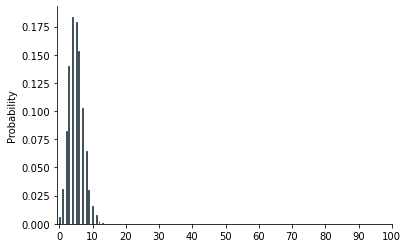

In [228]:
myplot = sns.histplot(data, stat="probability")
myplot.set_xticks(ticks);

### Implementation of freethrow experiment in python

In [229]:
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [230]:
# Implement freethrow game
n = 10 # number of throws
x = 0.3 # number of successful throws


B = stats.binom(n,x)
B.rvs(1)


array([1])

In [231]:
# Implement experiment
n_exp = 20 # number of experiments 

experiment = B.rvs(n_exp)
xbar = np.mean(experiment)
xbar

3.8

In [232]:
# Repeat experiment x times
n_sims = 100_000 
xbars = []

for i in range(n_sims):
    # conduct experiment
    results = B.rvs(n_exp)
    # calculate average of succesful throws (repeat 10 freethrows 20 times)
    xbar = np.mean(results)
    # store each experiment in list
    xbars.append(xbar)

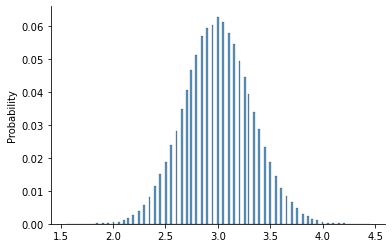

In [233]:
sns.histplot(xbars, stat="probability")
sns.despine()

We can see that the average number of successful throws per experiment is approximately normally distributed

### For-loop

Concept of `for-loop`:

```python
for step in steps:
    do something
```

here: `steps` needs to be something that can be iterated over
- a list
- a numpy array
- a dataframe 
- etc.

In [234]:
liste = [1,2,3,4]
for element in liste:
    print("Ich bin eine: ", element)

Ich bin eine:  1
Ich bin eine:  2
Ich bin eine:  3
Ich bin eine:  4


In [235]:
arr = np.array([10,9,7,1,-34])
for el in arr:
    print(el*3)

30
27
21
3
-102


In [236]:
liste = [10,9,7,1,-34]
new_liste = []
for el in liste:
    new_el = el * 3
    new_liste.append(new_el)

new_liste

[30, 27, 21, 3, -102]

Improving the code:

- experiment is repeated many times
- better to put experiment in a function

In [237]:
def experiment(dist, n):
    results = dist.rvs(n)
    return np.mean(results)

def myhistplot(data, title):
    ax = sns.histplot(data)
    ax.set_title(title)
    sns.despine()
    return ax

In [238]:
xbars = []
for i in range(n_sims):
    xbar = experiment(B,20)
    xbars.append(xbar)

<AxesSubplot:title={'center':'My first plot'}, ylabel='Count'>

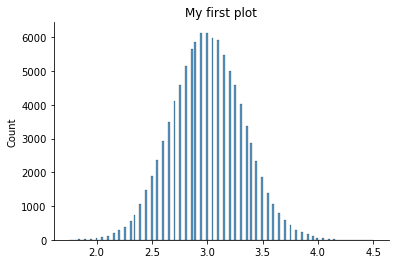

In [239]:
myhistplot(xbars, "My first plot")

## Statistical inference

<AxesSubplot:ylabel='Count'>

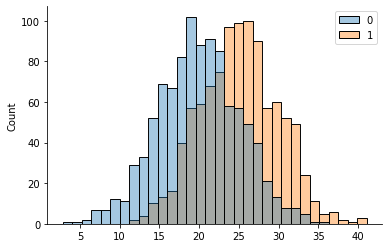

In [352]:
# Simuluation of minutes watched before and after introducing feature
n = 1_000
min_before = stats.norm(20,5).rvs(n) 
min_after = stats.norm(25,5).rvs(n)
min_delta = min_after - min_before


sns.histplot([min_before, min_after], alpha=0.4)

Difference in minutes watched on average

In [353]:
xbar = np.mean(min_delta)
xbar

5.10118631344289

<AxesSubplot:ylabel='Count'>

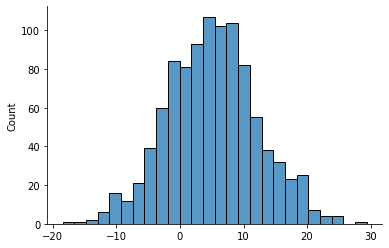

In [354]:
sns.histplot(min_delta)

Calculate test statistic $T$:

$$T = \dfrac{|{\hat{\Theta}}|}{SE(\hat{\Theta})}$$

where:
$SE$ =  $\sqrt{\frac{SE_{before}^2}{n}  + \frac{SE_{after}^2}{n} }$

In [356]:
se = np.sqrt(np.std(min_before)**2 / n + np.std(min_after)**2 / n) # see p. 110
T = xbar / se
T

22.768335369086312

What is the likelihood of observing a test statistic of this value if we repeated the experiment many times?

In [357]:
tdist = stats.t(n-1)
pvalue = 2*(1-tdist.cdf(T))
pvalue

0.0

Using `scipy.stats` we can use build-in functionality to test two samples for difference in means:

In [350]:
stats.ttest_ind(min_after,min_before)

Ttest_indResult(statistic=4.7781855204867325, pvalue=1.8977014041457598e-06)